# Mały projekt 1: wizualizacja poziomu zanieczyszczeń (PM2.5)

Główny Inspektorat Ochrony Środowiska (GIOS) udostępnia dane o jakości powietrza w Polsce na stronie [https://powietrze.gios.gov.pl](https://powietrze.gios.gov.pl), tj. poziom stężenia pyłów PM2.5, PM10, SO2 i innych zanieczyszczeń. Dane te są szczególnie przydatne w analizach środowiskowych i zdrowotnych. W tym zadaniu interesują nas godzinne pomiary stężeń drobnego pyłu **PM2.5** (pyłu o średnicy poniżej 2.5 µm) w latach **2014, 2019 i 2024**. Pyły PM2.5 są one bardzo szkodliwe dla zdrowia, gdyż mogąc przenikać głęboko do układu oddechowego i krwiobiegu. Zadanie polega na przeprowadzeniu analizy danych wraz z opisami czynności oraz wykresami.

## Wymagania ogólne

- Rozwiązanie należy przygotować w formie **Jupyter Notebooka (`.ipynb`)**.  Rozwiązanie proszę przesłać przez Moodle’a.
- Wszystkie operacje czyszczenia i łączenia danych wykonaj **programistycznie**, bez ręcznej edycji plików.
- Do każdego punktu należy obowiązkowo dodać opis z analizą otrzymanych wyników.  
- Zadanie należy wykonać w wylosowanych parach. Obie osoby z pary przesyłają **identyczne pliki** i dodają na początku notebooka opis swojego wkładu.
- Ocena jest wspólna dla pary, a nie indywidualna.

## Dane wejściowe i metadane

- Każdy rok to archiwum ZIP dostępne pod adresem [https://powietrze.gios.gov.pl/pjp/archives/](https://powietrze.gios.gov.pl/pjp/archives/).
- Wewnątrz znajdują się pliki Excel, np. `2024_PM25_1g.xlsx`.
- Poniższa funkcja `download_gios_archive` pozwala odczytać odpowiedni zbior danych; resztę danych pomijamy.
- Użyj pliku metadanych (dostępnego na tej samej stronie), aby zaktualizować **kody stacji** (część stacji mogła w międzyczasie zmienić nazwę). W metadanych znajdziesz odpowiednie kolumny.

## Zadania

### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

## Dodatkowe wymagania i sugestie

- Notebook powinien zawierać *sanity checks*, np.:
  - liczba stacji w każdym pliku,
  - liczba dni w każdym roku,  
  - kilka przykładowych mapowań kodów stacji,  
- Wszystkie wykresy powinny mieć tytuły, legendy i krótki opis interpretacji.
- Zachęcamy do weryfikacji kodu napisanego przez drugą osobę, gdyż ocena jest wspólna.
- Można wykorzystać dowolne poznane biblioteki do analizy i wizualizacji danych w Pythonie.

## Kryteria oceny

- Zadanie 1: 3 pkt
- Zadanie 2: 2 pkt
- Zadanie 3: 1.5 pkt
- Zadanie 4: 2 pkt
- Jakość wyjaśnień, interpretacje, opis wkładu: 1.5 pkt



Aleksandra Pawłowska - part 1 and part 4 of the project

Max Stróżyk - part 2 and part 3 of the project

In [2]:
# general packages 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

# functions scripts
from scripts.load_data import * 
from scripts.analyse_data import *

# paths
PATH_DATA = Path('data') 

In [4]:
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {
    2015: "236", 
    2018: "603",
    2021: "486",
    2024: "582"
}
gios_pm25_file = {
    2015: "2015_PM25_1g.xlsx",
    2018: "2018_PM25_1g.xlsx",
    2021: "2021_PM25_1g.xlsx",
    2024: "2024_PM25_1g.xlsx"
}


In [5]:
df2015_raw = download_gios_archive(2015, gios_url_ids[2015], gios_pm25_file[2015])
df2018_raw = download_gios_archive(2018, gios_url_ids[2018], gios_pm25_file[2018])
df2021_raw = download_gios_archive(2021, gios_url_ids[2021], gios_pm25_file[2021])
df2024_raw = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

In [42]:
df2015 = clean_gios_data(df2015_raw)
df2018 = clean_gios_data(df2018_raw)
df2021 = clean_gios_data(df2021_raw)
df2024 = clean_gios_data(df2024_raw)

c:\Users\Yoga\Desktop\projekt_zaawansowane\mini_project_ZTPDB_1\scripts\load_data.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")


In [40]:
num_stations_2015 = df2015.shape[1] 
num_stations_2018 = df2018.shape[1]  
num_stations_2021 = df2021.shape[1]
num_stations_2024 = df2024.shape[1]
unique_days_shifted = df2015.index.normalize().unique()

num_days_2015 = len(pd.unique(unique_days_shifted))
num_days_2018 = len(pd.unique(df2018.index.date))
num_days_2021 = len(pd.unique(df2021.index.date))
num_days_2024 = len(pd.unique(df2024.index.date))

print(f"Number of days in 2015: {num_days_2015}")
print(f"Number of days in 2018: {num_days_2018}")
print(f"Number of days in 2021: {num_days_2021}")
print(f"Number of days in 2024: {num_days_2024}")

print(f"\nNumber of stations in 2015: {num_stations_2015}")
print(f"Number of stations in 2018: {num_stations_2018}")
print(f"Number of stations in 2021: {num_stations_2021}")
print(f"Number of stations in 2024: {num_stations_2024}")



Number of days in 2015: 365
Number of days in 2018: 0
Number of days in 2021: 365
Number of days in 2024: 366

Number of stations in 2015: 42
Number of stations in 2018: 51
Number of stations in 2021: 88
Number of stations in 2024: 96


In [31]:
df2018_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,Nr,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
1,Kod stacji,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,KpWloclOkrze,LbLubObywate,LdLodzCzerni,...,SkKonsGranatMOB,SkPolaRuszcz,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,WpPoznDabrow,ZpSzczAndr01,ZpSzczPils02
2,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
3,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
4,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
5,Czas pomiaru,DsJelGorOgin-PM2.5-1g,DsWrocAlWisn-PM2.5-1g,DsWrocWybCon-PM2.5-1g,KpBydPlPozna-PM2.5-1g,KpBydWarszaw-PM2.5-1g,KpToruDziewu-PM2.5-1g,KpWloclOkrze-PM2.5-1g,LbLubObywate-PM2.5-1g,LdLodzCzerni-PM2.5-1g,...,SkKonsGranatMOB-PM2.5-1g,SkPolaRuszcz-PM2.5-1g,SlBielPartyz-PM2.5-1g,SlKatoKossut-PM2.5-1g,SlZlotPotLes-PM2.5-1g,WmOlsPuszkin-PM2.5-1g,WpKaliSawick-PM2.5-1g,WpPoznDabrow-PM2.5-1g,ZpSzczAndr01-PM2.5-1g,ZpSzczPils02-PM2.5-1g
6,2018-01-01 01:00:00,"43,0102","71,494","70,2","49,2716","69,6873","18,778",NaN,"30,9","16,0",...,NaN,"27,68",NaN,"76,8469","25,9266","41,3687",NaN,NaN,"26,5445","12,8035"
7,2018-01-01 02:00:00,"5,38425","7,89305","13,1522","36,236","42,3178",NaN,NaN,"54,8","83,0",...,NaN,"18,48",NaN,"39,3395","32,7522","25,8502",NaN,NaN,NaN,NaN
8,2018-01-01 03:00:00,"4,52882","12,5392","12,5","14,7514",NaN,NaN,NaN,"24,3","16,0",...,NaN,"15,59",NaN,"23,2554","37,6664","22,4599",NaN,NaN,"10,4332","32,0944"
9,2018-01-01 04:00:00,"8,68036","5,03196","8,85164","17,1654",NaN,"13,353",NaN,"15,1","14,0",...,NaN,"12,32",NaN,"22,3614","32,4625","20,1625",NaN,NaN,"28,1885","27,3274"


In [ ]:
import pandas as pd

df = df2018_raw.copy()

df.columns = df.iloc[1]

# Wiersze z danymi zaczynają się od wiersza 6 (indeks 5)
df = df.iloc[5:].reset_index(drop=True)

# Zmieniamy nazwę pierwszej kolumny na 'Data'
df.rename(columns={df.columns[0]: "Data"}, inplace=True)

# Usuń wiersze, gdzie Data nie jest datą
df = df[pd.to_datetime(df["Data"], errors='coerce').notna()]

# Konwersja kolumn liczbowych
for col in df.columns[1:]:
    # tylko jeśli typ danych to string
    if df[col].dtype == object:
        df[col] = df[col].str.replace(",", ".")
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Konwersja kolumny Data na datetime
df["Data"] = pd.to_datetime(df["Data"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Ustawiamy indeks
df.set_index("Data", inplace=True)

df.head()


C:\Users\Yoga\AppData\Local\Temp\ipykernel_6816\1777900531.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df["Data"], errors='coerce').notna()]


1,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpToruDziewu,KpWloclOkrze,LbLubObywate,LdLodzCzerni,LdLodzGdansk,...,SkKonsGranatMOB,SkPolaRuszcz,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmOlsPuszkin,WpKaliSawick,WpPoznDabrow,ZpSzczAndr01,ZpSzczPils02
Data,,,,,,,,,,,,,,,,,,,,,
2018-01-01 01:00:00,43.01020,71.49400,70.20000,49.2716,69.6873,18.778,NaN,30.9,16.0,68.349,...,NaN,27.68,NaN,76.8469,25.9266,41.3687,NaN,NaN,26.5445,12.8035
2018-01-01 02:00:00,5.38425,7.89305,13.15220,36.2360,42.3178,NaN,NaN,54.8,83.0,39.999,...,NaN,18.48,NaN,39.3395,32.7522,25.8502,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,4.52882,12.53920,12.50000,14.7514,NaN,NaN,NaN,24.3,16.0,17.949,...,NaN,15.59,NaN,23.2554,37.6664,22.4599,NaN,NaN,10.4332,32.0944
2018-01-01 04:00:00,8.68036,5.03196,8.85164,17.1654,NaN,13.353,NaN,15.1,14.0,12.699,...,NaN,12.32,NaN,22.3614,32.4625,20.1625,NaN,NaN,28.1885,27.3274
2018-01-01 05:00:00,7.20000,11.91360,7.29656,12.5788,NaN,NaN,NaN,12.6,12.0,12.699,...,NaN,10.03,NaN,28.9092,27.1350,18.3681,NaN,NaN,40.1738,61.1957


In [ ]:
# general packages 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

# functions scripts
from scripts.load_data import * 
from scripts.analyse_data import *

# paths
PATH_DATA = Path('data') 

In [ ]:
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {
    2015: "236", 
    2018: "603",
    2021: "486",
    2024: "582"
}
gios_pm25_file = {
    2015: "2015_PM25_1g.xlsx",
    2018: "2018_PM25_1g.xlsx",
    2021: "2021_PM25_1g.xlsx",
    2024: "2024_PM25_1g.xlsx"
}


In [ ]:
df2015_raw = download_gios_archive(2015, gios_url_ids[2015], gios_pm25_file[2015])
df2018_raw = download_gios_archive(2018, gios_url_ids[2018], gios_pm25_file[2018])
df2021_raw = download_gios_archive(2021, gios_url_ids[2021], gios_pm25_file[2021])
df2024_raw = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])

In [44]:
df2015 = clean_gios_data(df2015_raw)
df2018 = clean_gios_data(df2018_raw)
df2021 = clean_gios_data(df2021_raw)
df2024 = clean_gios_data(df2024_raw)

C:\Users\Yoga\AppData\Local\Temp\ipykernel_6816\2520059373.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")
C:\Users\Yoga\AppData\Local\Temp\ipykernel_6816\2520059373.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")
C:\Users\Yoga\AppData\Local\Temp\ipykernel_6816\2520059373.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Data"] = pd.to_datetime(df["Data"], errors="coerce")


In [45]:
num_stations_2015 = df2015.shape[1] 
num_stations_2018 = df2018.shape[1]  
num_stations_2021 = df2021.shape[1]
num_stations_2024 = df2024.shape[1]
unique_days_shifted = df2015.index.normalize().unique()

num_days_2015 = len(pd.unique(unique_days_shifted))
num_days_2018 = len(pd.unique(df2018.index.date))
num_days_2021 = len(pd.unique(df2021.index.date))
num_days_2024 = len(pd.unique(df2024.index.date))

print(f"Number of days in 2015: {num_days_2015}")
print(f"Number of days in 2018: {num_days_2018}")
print(f"Number of days in 2021: {num_days_2021}")
print(f"Number of days in 2024: {num_days_2024}")

print(f"\nNumber of stations in 2015: {num_stations_2015}")
print(f"Number of stations in 2018: {num_stations_2018}")
print(f"Number of stations in 2021: {num_stations_2021}")
print(f"Number of stations in 2024: {num_stations_2024}")



Number of days in 2015: 365
Number of days in 2018: 365
Number of days in 2021: 365
Number of days in 2024: 366

Number of stations in 2015: 42
Number of stations in 2018: 51
Number of stations in 2021: 88
Number of stations in 2024: 96


In [ ]:
df2019 = clean_column_names(df2019)
df2024 = clean_column_names(df2024)

print(df2015.columns[:10])
print(df2018.columns[:10])
print(df2021.columns[:10])
print(df2024.columns[:10])

df2015.rename(columns=mapping, inplace=True)
df2018.rename(columns=mapping, inplace=True)
df2021.rename(columns=mapping, inplace=True)
df2024.rename(columns=mapping, inplace=True)

Index(['DsWrocAlWisn', 'KpWiktorowoG', 'KpBydPlPozna', 'KpBydWarszaw',
       'KpToruDziewu', 'LdLodzCzerni', 'LdZgieMielcz', 'LuZielKrotka',
       'MpKrakAlKras', 'MpKrakBujaka'],
      dtype='object', name=0)
Index(['DsDusznikMOB', 'DsJaworMOB', 'DsJelGorOgin', 'DsWrocAlWisn',
       'DsWrocWybCon', 'KpBydPlPozna', 'KpMogiNowMOB', 'KpToruDziewu',
       'KpWloclOkrze', 'LbLubObywate'],
      dtype='object', name=5)
Index(['DsChojnowMalMOB', 'DsJelGorOgin', 'DsKlodzSzkol', 'DsKudowaSzkoMOB',
       'DsWrocAlWisn', 'DsWrocWybCon', 'KpBydPlPozna', 'KpBydWarszaw',
       'KpNaklWawrzy', 'KpSwiecJPawlMOB'],
      dtype='object', name=5)


In [ ]:
# Finding common stations
common_stations = list(set(df2014.columns) & set(df2019.columns) & set(df2024.columns))
print(f"Liczba wspólnych stacji: {len(common_stations)}")

df2014 = df2014[common_stations]
df2019 = df2019[common_stations]
df2024 = df2024[common_stations]

Liczba wspólnych stacji: 24


`Managing NA values`

We did not use `fill_na` function because it led to lack of data in examined stations. To do it properly we would create clusters of stations based on similiar densities of *PM2.5* in different years, then we would fill out missing values by averaging month values in other stations in the same cluster. 

In [ ]:
# combining data
combined = pd.concat([df2015, df2018, df2021, df2024]).sort_index()
combined = combined.dropna(how="all")

combined.index = pd.to_datetime(combined.index)
combined = combined.sort_index()

print(combined.shape)
print(f"\nCombined df starts on: \n{combined.index.min()} \nand ends on: \n{combined.index.max()}")
# combined = fill_na(combined)
combined.to_csv(PATH_DATA / "PM25_combined_2015_2018_2021_2024.csv")

df = combined

(26304, 24)

Combined df starts on: 
2014-01-01 00:00:00 
and ends on: 
2024-12-31 23:00:00


# Parts 2 and 3

## Results 
From regression plot `Mean PM2.5 concentration in ['Warszawa', 'Katowice']` we can see a significant reduction in PM2.5 concentrations, especially during the heating season.

In the heatmaps, the minimum value was set to $10,\mu\mathrm{g/m^3}$ because this is the target annual limit that EU countries are expected to meet by 2030 [1]. The plots show that the analysed cities do not yet meet this criterion, and the exceedances are particularly high in cities located in the southern part of Poland.

## Analysis
**Limits**

For 2020, the required annual limit for PM2.5 was set at $20,\mu\mathrm{g/m^3}$ [2]. Based on the `heatmaps`, most cities appear to have reached this limit by 2024.

**Reduction**

The most substantial reductions occur during the heating seasons. This is because one of the main sources of PM2.5 in Poland is the combustion of solid fuels in low-quality stoves and old boilers. In recent years many of these have been replaced or phased out, which directly contributes to the observed decline in PM2.5 concentrations [3].


# Bibliography:

[1] [Progress and policies to achieve the zero pollution action plan and EU 2024/2881 PM2.5 targets in Northern Italy](https://www.nature.com/articles/s41598-025-17176-x)

[2] [Poziomy dopuszczalne zanieczyszczeń w powietrzu ze względu na ochronę zdrowia ludzi i ochronę roślin, terminy ich osiągnięcia oraz okresy, dla których uśrednia się wyniki pomiarów - gios.gov.pl](https://powietrze.gios.gov.pl/pjp/content/annual_assessment_air_acceptable_level)

[3] [Dbamy o jakość powietrza w Polsce. Wprowadzamy zmiany w wymaganiach jakościowych dla paliw stałych [ROZPORZĄDZENIE] - gov.pl](https://www.gov.pl/web/klimat/dbamy-o-jakosc-powietrza-w-polsce-wprowadzamy-zmiany-w-wymaganiach-jakosciowych-dla-paliw-stalych-rozporzadzenie)

Part  2

In [ ]:
# part with mean values 
time_to_month(df) 

,ZpSzczPilsud,MzLegZegrzyn,DsWrocAlWisn,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,LuZielKrotka,MzPlocMiReja,ZpSzczAndrze,PdBialUpalna,...,MzRadTochter,LdLodzCzerni,MzWarWokalna,SlZlotPotLes,PmGdaLeczkow,LdZgieMielcz,WmOlsPuszkin,MpKrakBulwar,SlKatoKossut,MpKrakAlKras
2014-01-01,32.398922,39.815343,42.797037,36.824947,42.847025,32.047507,42.946602,31.855108,32.280684,22.039498,...,40.485457,35.407387,28.370219,25.105590,15.574259,31.518199,25.550652,47.241565,47.531587,60.350806
2014-02-01,32.134731,62.753609,38.649351,55.307686,43.510433,51.465929,33.748299,50.473512,22.655796,34.478514,...,53.218289,45.704915,41.428399,32.390863,25.712251,46.359747,40.799969,62.591045,57.502297,86.708955
2014-03-01,37.271277,47.863719,36.125000,45.742247,45.567347,30.040347,37.276358,31.600595,26.832721,28.669522,...,43.391626,35.259896,31.348221,21.564371,15.098253,36.861373,24.921921,39.900135,42.855405,54.498652
2014-04-01,22.124302,27.777273,25.353659,26.113754,29.082759,20.732240,23.778929,20.852646,15.903186,18.687154,...,27.699527,23.474251,21.101069,14.539735,13.423333,18.767278,17.748875,24.543417,26.925608,34.743300
2014-05-01,12.351079,14.622747,14.963925,14.187658,16.551867,10.376133,12.545727,12.079019,10.925751,9.895402,...,14.581354,16.407493,13.206132,8.812585,10.499194,11.068347,13.588730,14.522849,14.893387,19.547718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,12.771909,9.005376,11.574059,9.493405,9.262936,12.971640,13.275719,10.782907,8.803360,10.822191,...,11.917204,9.851478,8.542896,11.338575,11.628857,10.932571,11.946774,12.918683,11.948790,12.731565
2024-09-01,16.876111,13.684167,13.114571,14.392222,12.187442,15.655602,19.249787,14.335278,14.048603,13.641168,...,15.653652,13.984844,12.797986,13.546314,16.022270,14.973056,15.639441,14.665833,13.956111,15.278442
2024-10-01,16.222581,16.339300,15.125575,16.474124,12.995296,17.301344,16.264714,14.956081,9.922207,12.582111,...,17.613525,16.039838,14.474684,13.939651,14.074832,22.542396,14.791233,16.725403,16.799194,17.136022
2024-11-01,12.273194,17.635286,20.102646,19.610987,19.244861,20.348472,15.278151,18.126287,9.608472,14.239888,...,22.847539,20.072308,15.920480,18.464714,13.743611,33.866328,16.302778,20.898750,22.538056,22.123889


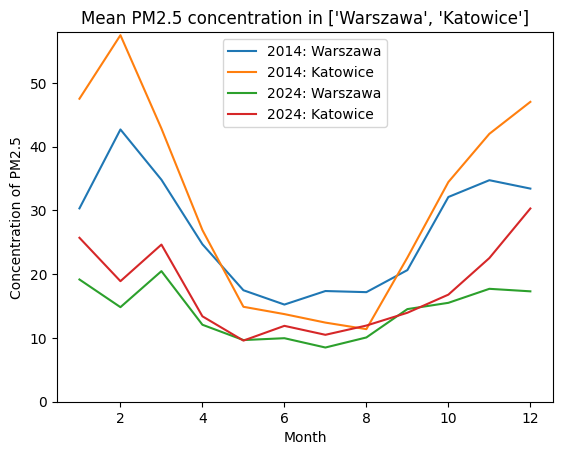

In [ ]:
# plot of PM2.5 concentration 
cities = ['Warszawa', 'Katowice']
years = [2014, 2024]
years_trend_cities(df, cities=cities, years=years)

Part 3

There is 36


c:\Users\Yoga\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Yoga\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


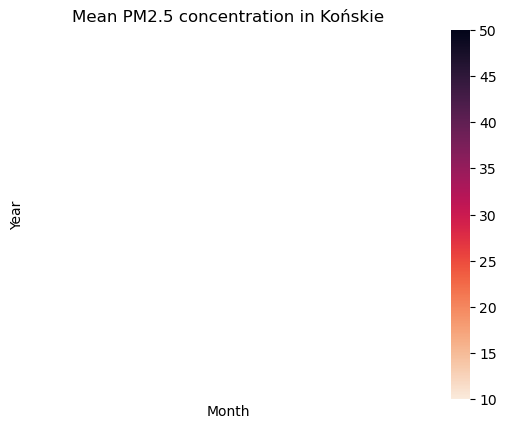

c:\Users\Yoga\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Yoga\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


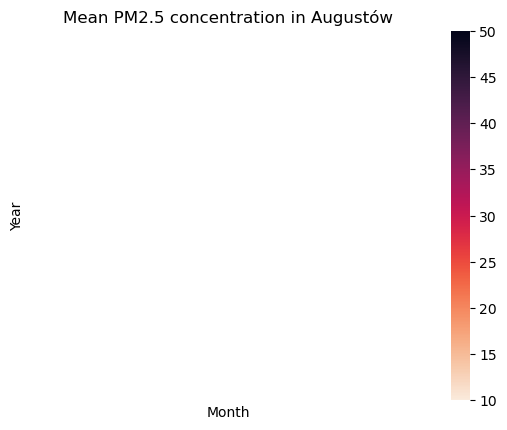

c:\Users\Yoga\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\Yoga\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


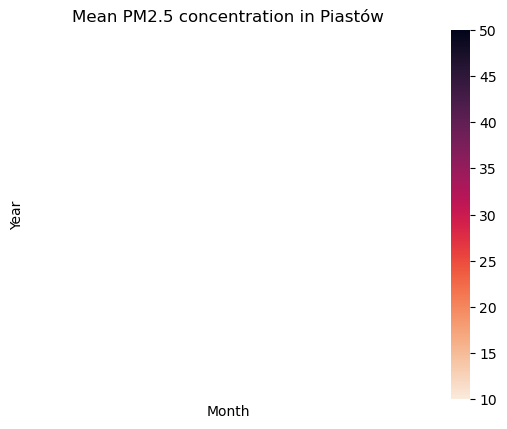

In [34]:
cities = ['Warszawa', 'Katowice']
years = [2014, 2019, 2024]
years_heatmaps_cities(df, cities='all', years=years)

Part 4



In [ ]:
daily_mean = 15 

exc2024, total2024 = get_daily_exceedances(df2024, daily_mean)
exc2019, total2019 = get_daily_exceedances(df2019, daily_mean)
exc2014, total2014 = get_daily_exceedances(df2014, daily_mean)

In [ ]:
print("=== 2024 ===")
top3_2024, bottom3_2024 = top3_bottom3_exceedances(exc2024)

print("\n=== 2019 ===")
top3_2019, bottom3_2019 = top3_bottom3_exceedances(exc2019)

print("\n=== 2014 ===")
top3_2014, bottom3_2014 = top3_bottom3_exceedances(exc2014)


=== 2024 ===
Top 3 stations with the most exceedance days:
  LdZgieMielcz: 189
  MpKrakAlKras: 178
  SlKatoKossut: 165

Bottom 3 stations with the fewest exceedance days:
  ZpSzczAndrze: 72
  PdBialUpalna: 76
  MzSiedKonars: 79

=== 2019 ===
Top 3 stations with the most exceedance days:
  MzWarAlNiepo: 299
  MpKrakAlKras: 291
  LdZgieMielcz: 244

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 71
  LuZielKrotka: 108
  PdBialUpalna: 111

=== 2014 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 351
  MzWarAlNiepo: 305
  WpKaliSawick: 292

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 159
  PdBialUpalna: 168
  SlZlotPotLes: 173


In [ ]:
selected_stations = list(top3_2024.index) + list(bottom3_2024.index)
plot_df = pd.DataFrame({
    "2014": exc2014[selected_stations],
    "2019": exc2019[selected_stations],
    "2024": exc2024[selected_stations]
})

plot_df = plot_df.T 
plot_df

,LdZgieMielcz,MpKrakAlKras,SlKatoKossut,ZpSzczAndrze,PdBialUpalna,MzSiedKonars
2014,186,351,254,175,168,245
2019,244,291,213,116,111,190
2024,189,178,165,72,76,79


<Figure size 1200x600 with 0 Axes>

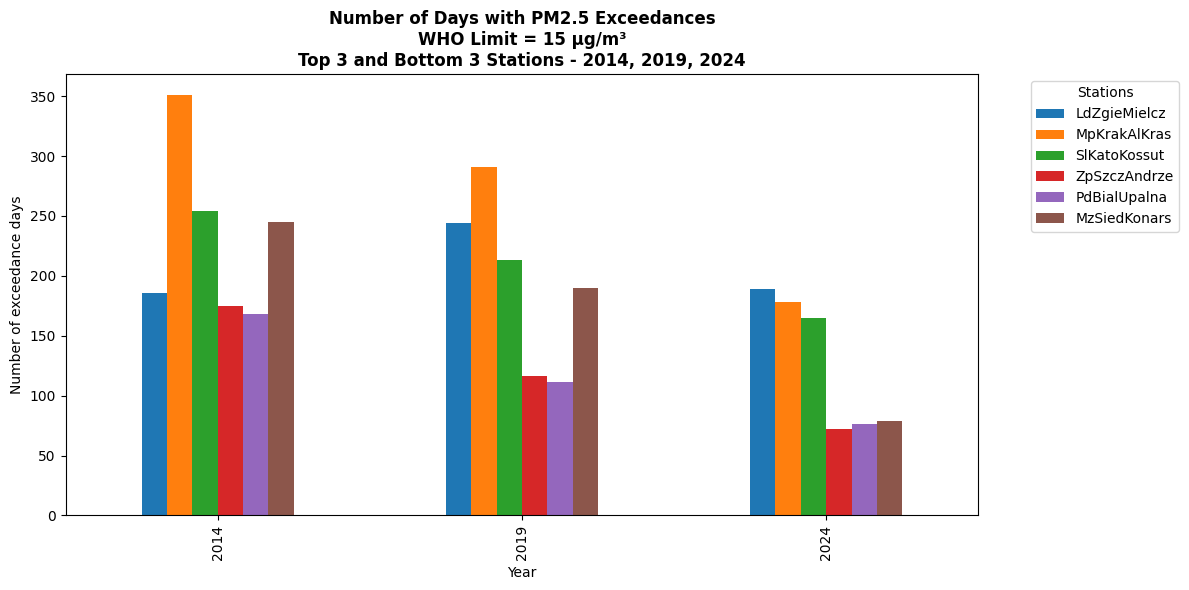

In [ ]:
plt.figure(figsize=(12,6))
plot_df.plot(kind="bar", figsize=(12,6))

plt.title(
    "Number of Days with PM2.5 Exceedances\nWHO Limit = 15 µg/m³\nTop 3 and Bottom 3 Stations - 2014, 2019, 2024",
    fontsize=12,
    fontweight='bold'
)
plt.xlabel("Year")
plt.ylabel("Number of exceedance days")
plt.legend(title="Stations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Interpretation of PM2.5 Exceedance Days (2014, 2019, 2024)

## 1. Top 3 stations with most exceedance days
- **Stations:** `MpKrakAlKras`, `SlKatoKossut`, `LdZgieMielcz`  
- **Trend:**  
  - `MpKrakAlKras`: 351 days (2014) → 291 days (2019) → 178 days (2024)  
  - `SlKatoKossut` and `LdZgieMielcz`: Similar decreasing trend over the years  
- **Interpretation:** Air quality in the most polluted stations has improved, likely due to emission reductions, traffic regulations, or cleaner heating methods.

## 2. Bottom 3 stations with fewest exceedance days
- **Stations:** `ZpSzczAndrze`, `MzSiedKonars`, `MzWarWokalna`  
- **Trend:**  
  - `ZpSzczAndrze`: 176 → 116 → 72  
  - `MzSiedKonars` and `MzWarWokalna`: Similar decreasing trend  
- **Interpretation:** These areas naturally have cleaner air (less traffic, more greenery), and the improvement over time is also visible.

## 3. General observations
- The gap between the top and bottom stations has narrowed over time.  
- Reduction in exceedance days is strongest in 2024, suggesting effective recent air quality policies or favorable meteorological conditions.  
- Air pollution is spatially heterogeneous: urban and industrial centers have far more days exceeding WHO limits than smaller or cleaner areas.


In [ ]:
df2019 = clean_column_names(df2019)
df2024 = clean_column_names(df2024)

print(df2015.columns[:10])
print(df2018.columns[:10])
print(df2021.columns[:10])
print(df2024.columns[:10])

df2015.rename(columns=mapping, inplace=True)
df2018.rename(columns=mapping, inplace=True)
df2021.rename(columns=mapping, inplace=True)
df2024.rename(columns=mapping, inplace=True)

Index(['DsWrocAlWisn', 'KpWiktorowoG', 'KpBydPlPozna', 'KpBydWarszaw',
       'KpToruDziewu', 'LdLodzCzerni', 'LdZgieMielcz', 'LuZielKrotka',
       'MpKrakAlKras', 'MpKrakBujaka'],
      dtype='object', name=0)
Index(['DsDusznikMOB', 'DsJaworMOB', 'DsJelGorOgin', 'DsWrocAlWisn',
       'DsWrocWybCon', 'KpBydPlPozna', 'KpMogiNowMOB', 'KpToruDziewu',
       'KpWloclOkrze', 'LbLubObywate'],
      dtype='object', name=5)
Index(['DsChojnowMalMOB', 'DsJelGorOgin', 'DsKlodzSzkol', 'DsKudowaSzkoMOB',
       'DsWrocAlWisn', 'DsWrocWybCon', 'KpBydPlPozna', 'KpBydWarszaw',
       'KpNaklWawrzy', 'KpSwiecJPawlMOB'],
      dtype='object', name=5)


In [19]:
# Finding common stations
common_stations = list(set(df2014.columns) & set(df2019.columns) & set(df2024.columns))
print(f"Liczba wspólnych stacji: {len(common_stations)}")

df2014 = df2014[common_stations]
df2019 = df2019[common_stations]
df2024 = df2024[common_stations]

Liczba wspólnych stacji: 24


`Managing NA values`

We did not use `fill_na` function because it led to lack of data in examined stations. To do it properly we would create clusters of stations based on similiar densities of *PM2.5* in different years, then we would fill out missing values by averaging month values in other stations in the same cluster. 

In [ ]:
# combining data
combined = pd.concat([df2015, df2018, df2021, df2024]).sort_index()
combined = combined.dropna(how="all")

combined.index = pd.to_datetime(combined.index)
combined = combined.sort_index()

print(combined.shape)
print(f"\nCombined df starts on: \n{combined.index.min()} \nand ends on: \n{combined.index.max()}")
# combined = fill_na(combined)
combined.to_csv(PATH_DATA / "PM25_combined_2015_2018_2021_2024.csv")

df = combined

(26304, 24)

Combined df starts on: 
2014-01-01 00:00:00 
and ends on: 
2024-12-31 23:00:00


# Parts 2 and 3

## Results 
From regression plot `Mean PM2.5 concentration in ['Warszawa', 'Katowice']` we can see a significant reduction in PM2.5 concentrations, especially during the heating season.

In the heatmaps, the minimum value was set to $10,\mu\mathrm{g/m^3}$ because this is the target annual limit that EU countries are expected to meet by 2030 [1]. The plots show that the analysed cities do not yet meet this criterion, and the exceedances are particularly high in cities located in the southern part of Poland.

## Analysis
**Limits**

For 2020, the required annual limit for PM2.5 was set at $20,\mu\mathrm{g/m^3}$ [2]. Based on the `heatmaps`, most cities appear to have reached this limit by 2024.

**Reduction**

The most substantial reductions occur during the heating seasons. This is because one of the main sources of PM2.5 in Poland is the combustion of solid fuels in low-quality stoves and old boilers. In recent years many of these have been replaced or phased out, which directly contributes to the observed decline in PM2.5 concentrations [3].


# Bibliography:

[1] [Progress and policies to achieve the zero pollution action plan and EU 2024/2881 PM2.5 targets in Northern Italy](https://www.nature.com/articles/s41598-025-17176-x)

[2] [Poziomy dopuszczalne zanieczyszczeń w powietrzu ze względu na ochronę zdrowia ludzi i ochronę roślin, terminy ich osiągnięcia oraz okresy, dla których uśrednia się wyniki pomiarów - gios.gov.pl](https://powietrze.gios.gov.pl/pjp/content/annual_assessment_air_acceptable_level)

[3] [Dbamy o jakość powietrza w Polsce. Wprowadzamy zmiany w wymaganiach jakościowych dla paliw stałych [ROZPORZĄDZENIE] - gov.pl](https://www.gov.pl/web/klimat/dbamy-o-jakosc-powietrza-w-polsce-wprowadzamy-zmiany-w-wymaganiach-jakosciowych-dla-paliw-stalych-rozporzadzenie)

Part  2

In [21]:
# part with mean values 
time_to_month(df) 

,ZpSzczPilsud,MzLegZegrzyn,DsWrocAlWisn,MzZyraRoosev,OpKKozBSmial,PkPrzemGrunw,LuZielKrotka,MzPlocMiReja,ZpSzczAndrze,PdBialUpalna,...,MzRadTochter,LdLodzCzerni,MzWarWokalna,SlZlotPotLes,PmGdaLeczkow,LdZgieMielcz,WmOlsPuszkin,MpKrakBulwar,SlKatoKossut,MpKrakAlKras
2014-01-01,32.398922,39.815343,42.797037,36.824947,42.847025,32.047507,42.946602,31.855108,32.280684,22.039498,...,40.485457,35.407387,28.370219,25.105590,15.574259,31.518199,25.550652,47.241565,47.531587,60.350806
2014-02-01,32.134731,62.753609,38.649351,55.307686,43.510433,51.465929,33.748299,50.473512,22.655796,34.478514,...,53.218289,45.704915,41.428399,32.390863,25.712251,46.359747,40.799969,62.591045,57.502297,86.708955
2014-03-01,37.271277,47.863719,36.125000,45.742247,45.567347,30.040347,37.276358,31.600595,26.832721,28.669522,...,43.391626,35.259896,31.348221,21.564371,15.098253,36.861373,24.921921,39.900135,42.855405,54.498652
2014-04-01,22.124302,27.777273,25.353659,26.113754,29.082759,20.732240,23.778929,20.852646,15.903186,18.687154,...,27.699527,23.474251,21.101069,14.539735,13.423333,18.767278,17.748875,24.543417,26.925608,34.743300
2014-05-01,12.351079,14.622747,14.963925,14.187658,16.551867,10.376133,12.545727,12.079019,10.925751,9.895402,...,14.581354,16.407493,13.206132,8.812585,10.499194,11.068347,13.588730,14.522849,14.893387,19.547718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-01,12.771909,9.005376,11.574059,9.493405,9.262936,12.971640,13.275719,10.782907,8.803360,10.822191,...,11.917204,9.851478,8.542896,11.338575,11.628857,10.932571,11.946774,12.918683,11.948790,12.731565
2024-09-01,16.876111,13.684167,13.114571,14.392222,12.187442,15.655602,19.249787,14.335278,14.048603,13.641168,...,15.653652,13.984844,12.797986,13.546314,16.022270,14.973056,15.639441,14.665833,13.956111,15.278442
2024-10-01,16.222581,16.339300,15.125575,16.474124,12.995296,17.301344,16.264714,14.956081,9.922207,12.582111,...,17.613525,16.039838,14.474684,13.939651,14.074832,22.542396,14.791233,16.725403,16.799194,17.136022
2024-11-01,12.273194,17.635286,20.102646,19.610987,19.244861,20.348472,15.278151,18.126287,9.608472,14.239888,...,22.847539,20.072308,15.920480,18.464714,13.743611,33.866328,16.302778,20.898750,22.538056,22.123889


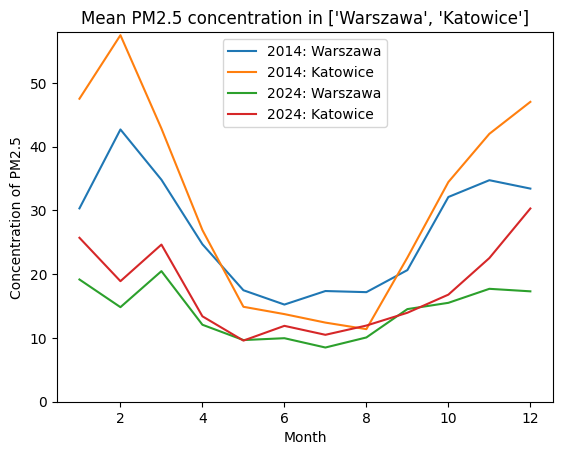

In [22]:
# plot of PM2.5 concentration 
cities = ['Warszawa', 'Katowice']
years = [2014, 2024]
years_trend_cities(df, cities=cities, years=years)

Part 3

There is 21


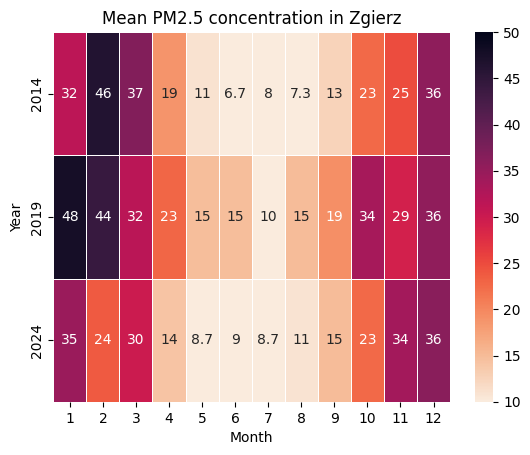

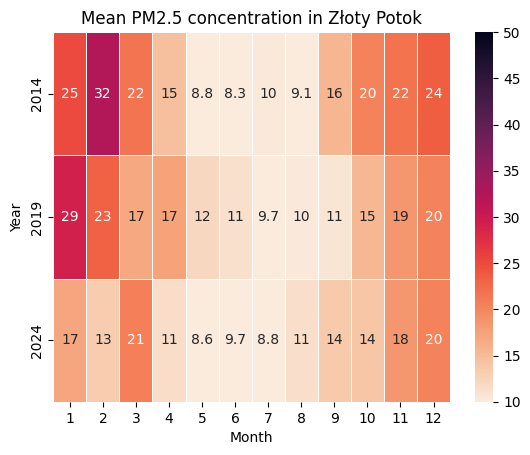

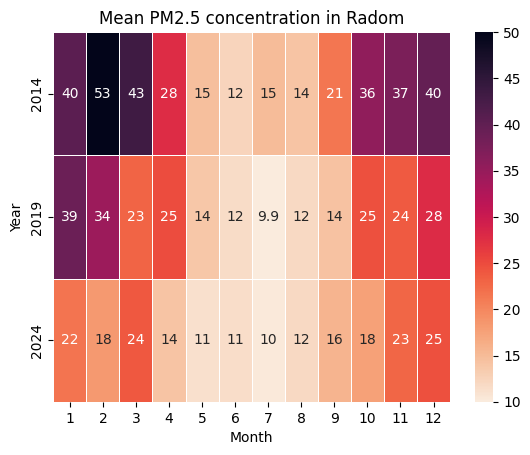

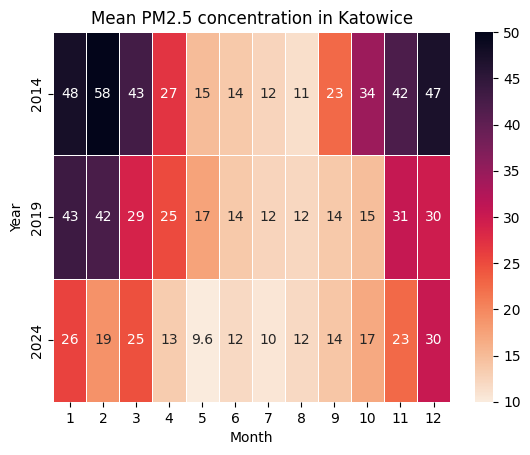

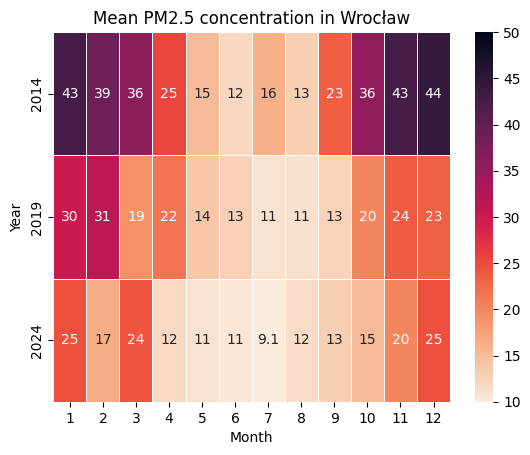

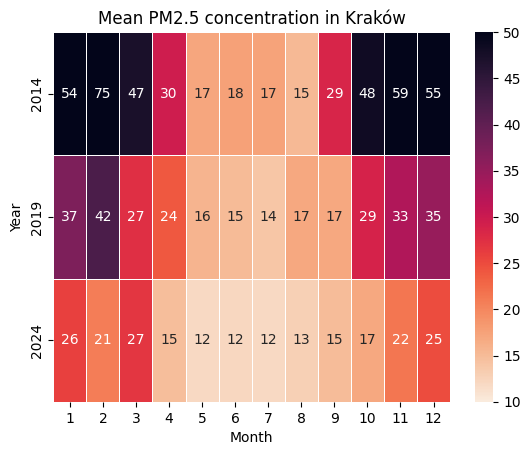

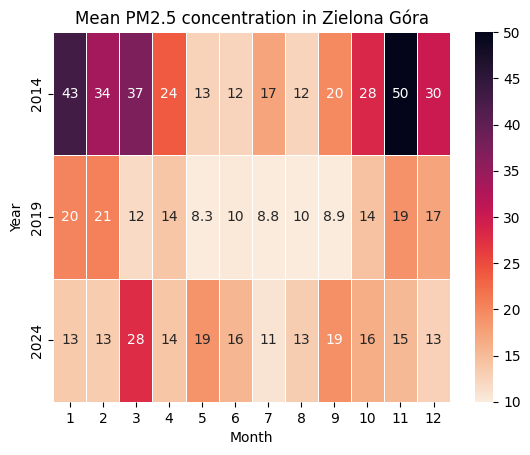

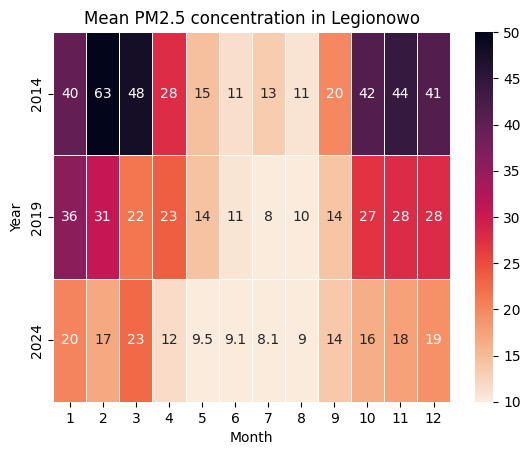

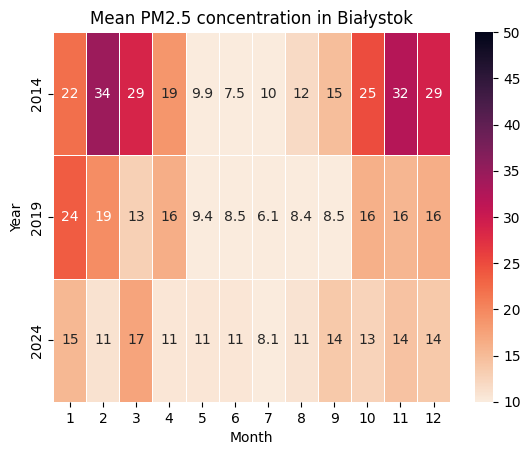

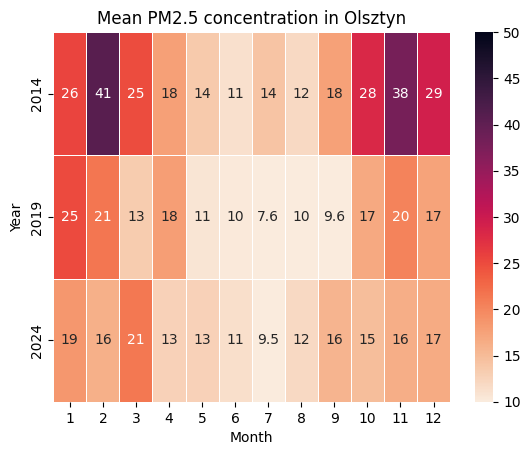

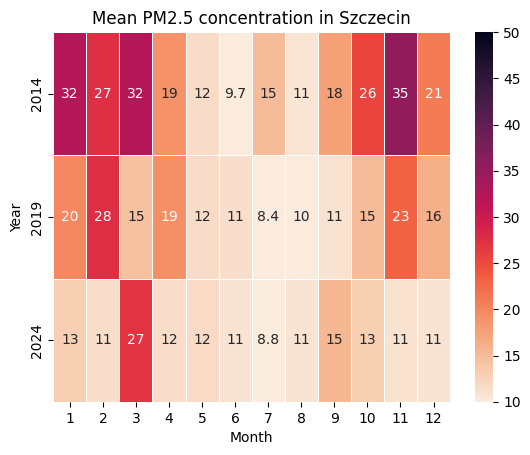

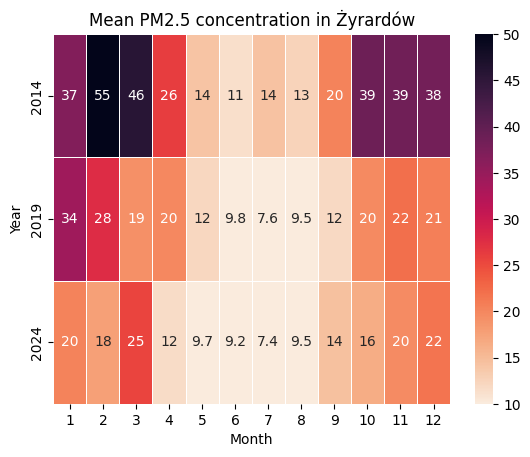

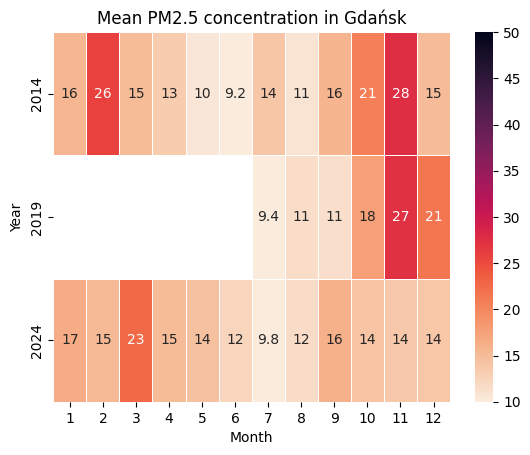

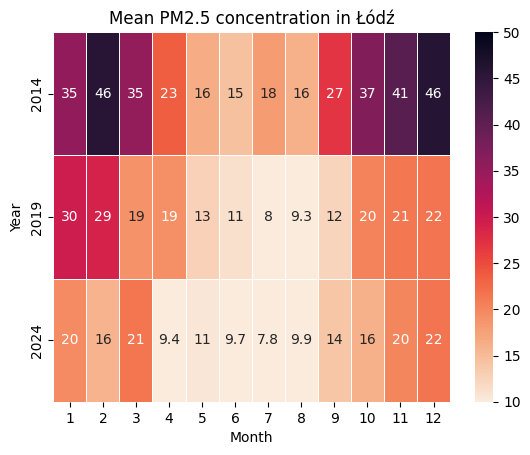

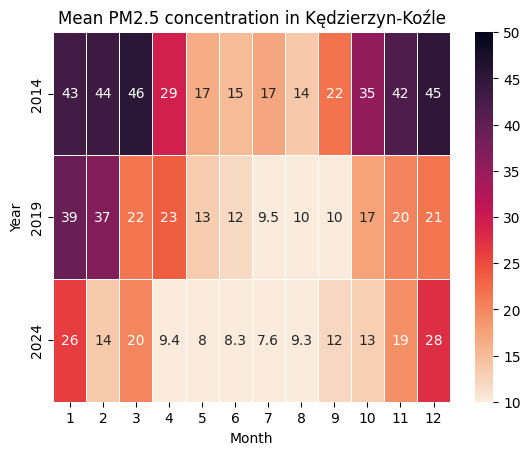

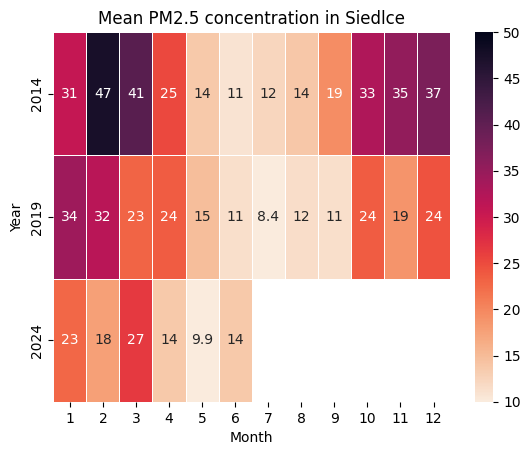

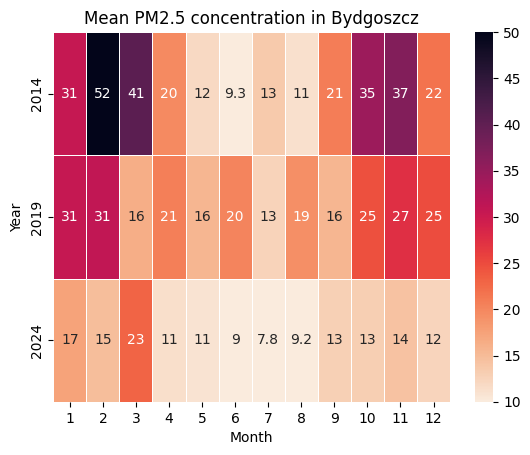

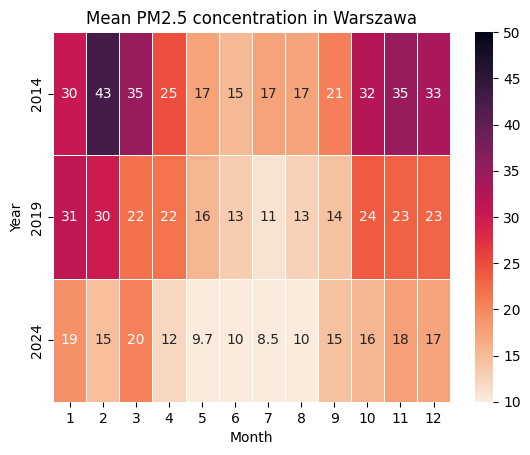

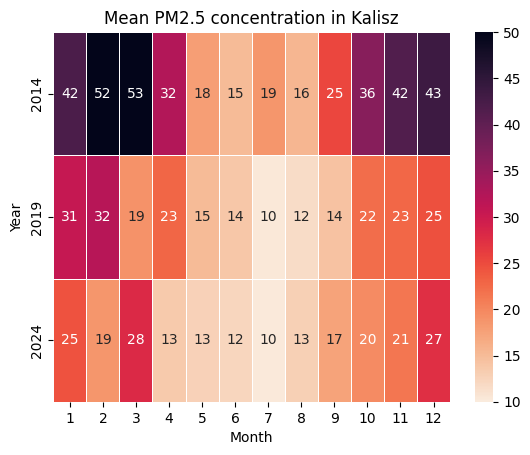

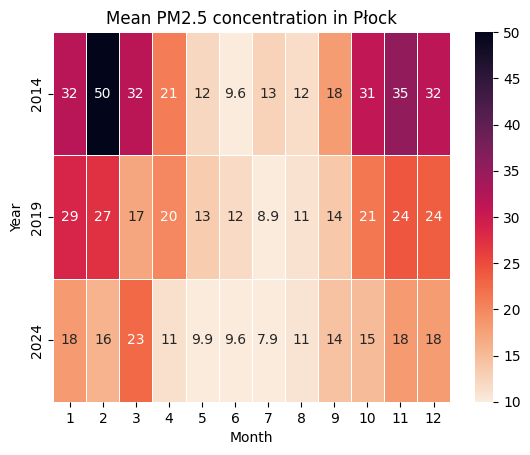

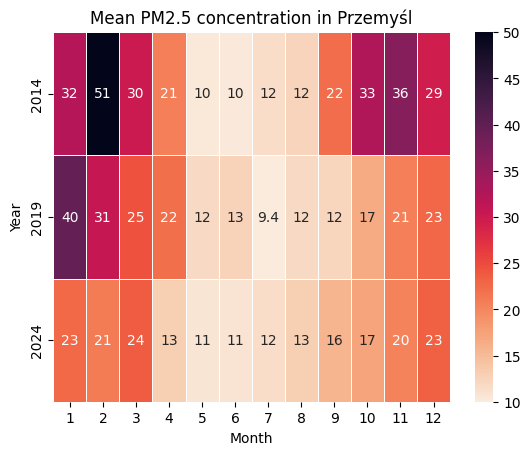

In [23]:
cities = ['Warszawa', 'Katowice']
years = [2014, 2019, 2024]
years_heatmaps_cities(df, cities='all', years=years)

Part 4



In [25]:
daily_mean = 15 

exc2024, total2024 = get_daily_exceedances(df2024, daily_mean)
exc2019, total2019 = get_daily_exceedances(df2019, daily_mean)
exc2014, total2014 = get_daily_exceedances(df2014, daily_mean)

In [26]:
print("=== 2024 ===")
top3_2024, bottom3_2024 = top3_bottom3_exceedances(exc2024)

print("\n=== 2019 ===")
top3_2019, bottom3_2019 = top3_bottom3_exceedances(exc2019)

print("\n=== 2014 ===")
top3_2014, bottom3_2014 = top3_bottom3_exceedances(exc2014)


=== 2024 ===
Top 3 stations with the most exceedance days:
  LdZgieMielcz: 189
  MpKrakAlKras: 178
  SlKatoKossut: 165

Bottom 3 stations with the fewest exceedance days:
  ZpSzczAndrze: 72
  PdBialUpalna: 76
  MzSiedKonars: 79

=== 2019 ===
Top 3 stations with the most exceedance days:
  MzWarAlNiepo: 299
  MpKrakAlKras: 291
  LdZgieMielcz: 244

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 71
  LuZielKrotka: 108
  PdBialUpalna: 111

=== 2014 ===
Top 3 stations with the most exceedance days:
  MpKrakAlKras: 351
  MzWarAlNiepo: 305
  WpKaliSawick: 292

Bottom 3 stations with the fewest exceedance days:
  PmGdaLeczkow: 159
  PdBialUpalna: 168
  SlZlotPotLes: 173


In [27]:
selected_stations = list(top3_2024.index) + list(bottom3_2024.index)
plot_df = pd.DataFrame({
    "2014": exc2014[selected_stations],
    "2019": exc2019[selected_stations],
    "2024": exc2024[selected_stations]
})

plot_df = plot_df.T 
plot_df

,LdZgieMielcz,MpKrakAlKras,SlKatoKossut,ZpSzczAndrze,PdBialUpalna,MzSiedKonars
2014,186,351,254,175,168,245
2019,244,291,213,116,111,190
2024,189,178,165,72,76,79


<Figure size 1200x600 with 0 Axes>

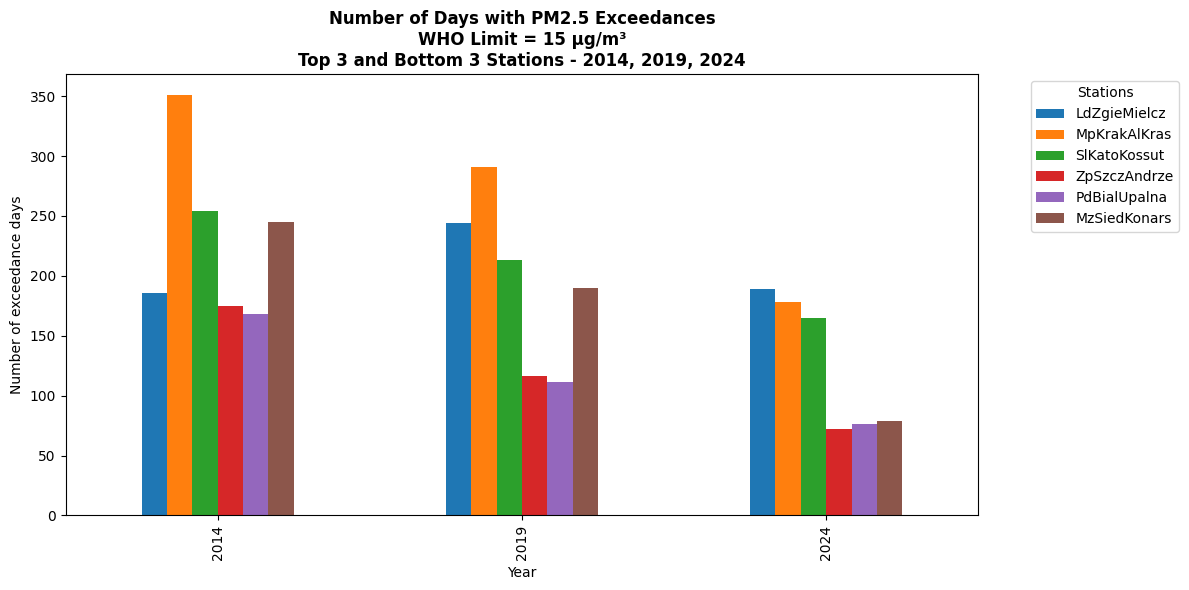

In [28]:
plt.figure(figsize=(12,6))
plot_df.plot(kind="bar", figsize=(12,6))

plt.title(
    "Number of Days with PM2.5 Exceedances\nWHO Limit = 15 µg/m³\nTop 3 and Bottom 3 Stations - 2014, 2019, 2024",
    fontsize=12,
    fontweight='bold'
)
plt.xlabel("Year")
plt.ylabel("Number of exceedance days")
plt.legend(title="Stations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Interpretation of PM2.5 Exceedance Days (2014, 2019, 2024)

## 1. Top 3 stations with most exceedance days
- **Stations:** `MpKrakAlKras`, `SlKatoKossut`, `LdZgieMielcz`  
- **Trend:**  
  - `MpKrakAlKras`: 351 days (2014) → 291 days (2019) → 178 days (2024)  
  - `SlKatoKossut` and `LdZgieMielcz`: Similar decreasing trend over the years  
- **Interpretation:** Air quality in the most polluted stations has improved, likely due to emission reductions, traffic regulations, or cleaner heating methods.

## 2. Bottom 3 stations with fewest exceedance days
- **Stations:** `ZpSzczAndrze`, `MzSiedKonars`, `MzWarWokalna`  
- **Trend:**  
  - `ZpSzczAndrze`: 176 → 116 → 72  
  - `MzSiedKonars` and `MzWarWokalna`: Similar decreasing trend  
- **Interpretation:** These areas naturally have cleaner air (less traffic, more greenery), and the improvement over time is also visible.

## 3. General observations
- The gap between the top and bottom stations has narrowed over time.  
- Reduction in exceedance days is strongest in 2024, suggesting effective recent air quality policies or favorable meteorological conditions.  
- Air pollution is spatially heterogeneous: urban and industrial centers have far more days exceeding WHO limits than smaller or cleaner areas.
